In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


> # **Read the datasets and information.**

In [2]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
data_description = ('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')

In [3]:
with open(data_description, 'r') as description:
    print(description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

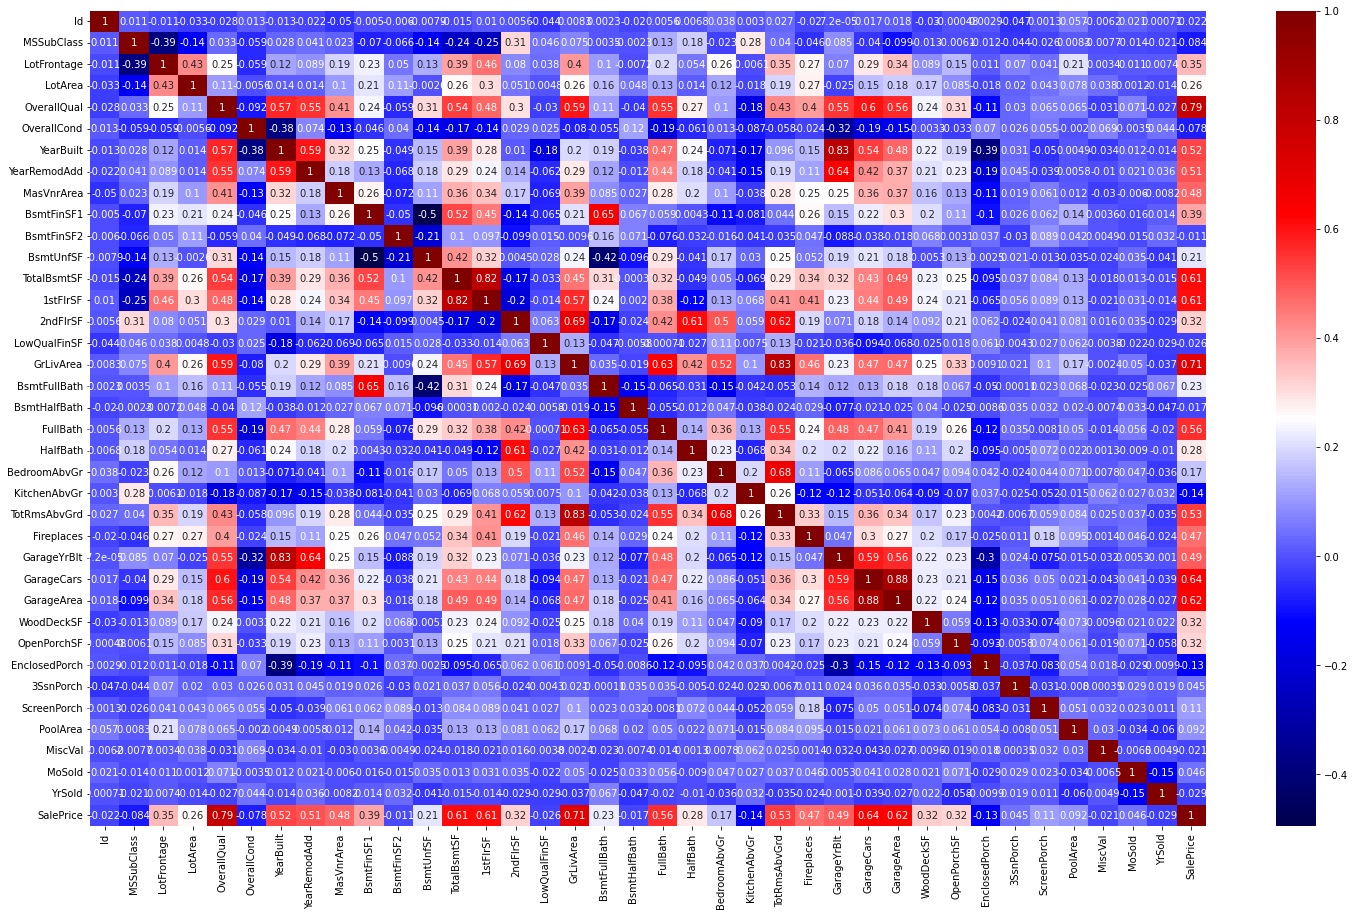

In [4]:
plt.figure(figsize=(25, 15))
sns.heatmap(train_data.corr(), cmap="seismic", annot=True)
plt.show()

## Training data

In [5]:
train_data.shape

(1460, 81)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Test data

In [7]:
test_data.shape

(1459, 80)

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

>  # **Data Preprocessing and Cleaning**

## Training data

In [9]:
train_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

### Handling the missing values

In [10]:
train_col_names = []
train_missing_values = []
train_percentage_of_missing_value = []
train_data_types =[]
train_unique_values = []

for i in train_data.columns[train_data.isna().sum() > 0]:
    train_col_names.append(i)
    train_missing_values.append(train_data[i].isna().sum())
    train_percentage_of_missing_value.append(round((train_data[i].isna().sum() / 1460) * 100, 2))
    train_data_types.append(train_data[i].dtypes)
    train_unique_values.append(train_data[i].nunique())

In [11]:
from prettytable import PrettyTable

train_my_table = PrettyTable()

train_my_table.add_column("Column name",train_col_names)
train_my_table.add_column("Missing value",train_missing_values)
train_my_table.add_column("% of missing", train_percentage_of_missing_value)
train_my_table.add_column("Data type", train_data_types)
train_my_table.add_column("Unique values", train_unique_values)

print(train_my_table)

+--------------+---------------+--------------+-----------+---------------+
| Column name  | Missing value | % of missing | Data type | Unique values |
+--------------+---------------+--------------+-----------+---------------+
| LotFrontage  |      259      |    17.74     |  float64  |      110      |
|    Alley     |      1369     |    93.77     |   object  |       2       |
|  MasVnrType  |       8       |     0.55     |   object  |       4       |
|  MasVnrArea  |       8       |     0.55     |  float64  |      327      |
|   BsmtQual   |       37      |     2.53     |   object  |       4       |
|   BsmtCond   |       37      |     2.53     |   object  |       4       |
| BsmtExposure |       38      |     2.6      |   object  |       4       |
| BsmtFinType1 |       37      |     2.53     |   object  |       6       |
| BsmtFinType2 |       38      |     2.6      |   object  |       6       |
|  Electrical  |       1       |     0.07     |   object  |       5       |
| FireplaceQ

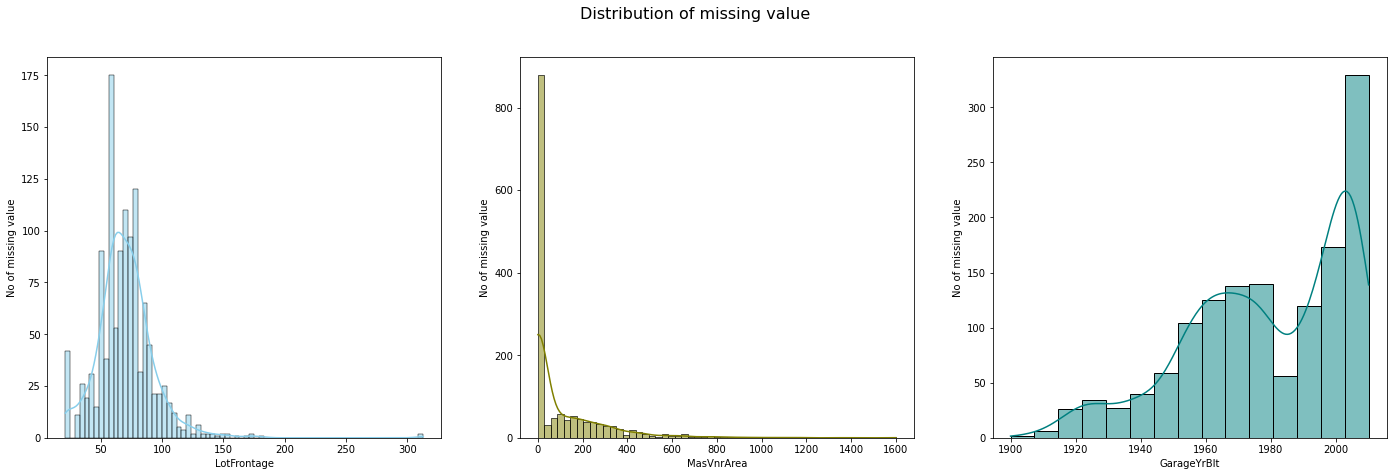

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(24, 7), squeeze=False)

sns.histplot(train_data['LotFrontage'], kde=True, color='skyblue', ax=axs[0, 0])
sns.histplot(train_data['MasVnrArea'], kde=True, color='olive', ax=axs[0, 1])
sns.histplot(train_data['GarageYrBlt'], kde=True, color='teal', ax=axs[0, 2])
axs[0, 0].set_ylabel('No of missing value')
axs[0, 1].set_ylabel('No of missing value')
axs[0, 2].set_ylabel('No of missing value')
fig.suptitle("Distribution of missing value", fontsize=16)
plt.show()

In [13]:
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].astype(str)

In [14]:
from sklearn.impute import SimpleImputer
train_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
train_imputer.fit(train_data[['LotFrontage', 'MasVnrArea']])
train_data[['LotFrontage', 'MasVnrArea']] = train_imputer.transform(train_data[['LotFrontage', 'MasVnrArea']])

In [15]:
train_GarageYrBlt = []
train_YearBuilt = []
for i in range(0,21):
    train_GarageYrBlt.append(train_data['GarageYrBlt'][i])
    train_YearBuilt.append(train_data['YearBuilt'][i])
train_Built_table = PrettyTable()
train_Built_table.add_column('GarageYrBlt', train_GarageYrBlt)
train_Built_table.add_column('YearBuilt', train_YearBuilt)
print(train_Built_table)

+-------------+-----------+
| GarageYrBlt | YearBuilt |
+-------------+-----------+
|    2003.0   |    2003   |
|    1976.0   |    1976   |
|    2001.0   |    2001   |
|    1998.0   |    1915   |
|    2000.0   |    2000   |
|    1993.0   |    1993   |
|    2004.0   |    2004   |
|    1973.0   |    1973   |
|    1931.0   |    1931   |
|    1939.0   |    1939   |
|    1965.0   |    1965   |
|    2005.0   |    2005   |
|    1962.0   |    1962   |
|    2006.0   |    2006   |
|    1960.0   |    1960   |
|    1991.0   |    1929   |
|    1970.0   |    1970   |
|    1967.0   |    1967   |
|    2004.0   |    2004   |
|    1958.0   |    1958   |
|    2005.0   |    2005   |
+-------------+-----------+


In [16]:
import warnings
warnings.filterwarnings("ignore")
for i in range(len(train_data['GarageYrBlt'])):
    if train_data['GarageYrBlt'][i] == 'nan':
        train_data['GarageYrBlt'][i] = str(train_data['YearBuilt'][i])

In [17]:
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].apply(pd.to_numeric)
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].astype(int)

In [18]:
train_data['Alley'] = train_data['Alley'].fillna('NA')
train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
train_data['BsmtQual'] = train_data['BsmtQual'].fillna('NA')
train_data['BsmtCond'] = train_data['BsmtQual'].fillna('NA')
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna('NA')
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna('NA')
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna('NA')
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('NA')
train_data['GarageType'] = train_data['GarageType'].fillna('NA')
train_data['GarageFinish'] = train_data['GarageFinish'].fillna('NA')
train_data['GarageQual'] = train_data['GarageQual'].fillna('NA')
train_data['GarageCond'] = train_data['GarageCond'].fillna('NA')
train_data['PoolQC'] = train_data['PoolQC'].fillna('NA')
train_data['Fence'] = train_data['Fence'].fillna('NA')
train_data['MiscFeature'] = train_data['MiscFeature'].fillna('NA')

In [19]:
train_columns_object = [col for col in train_data.columns if (train_data[col].dtypes == 'object' and train_data[col].isna().sum() > 0)]
train_columns_object

['Electrical']

In [20]:
train_object_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_object_imputer.fit(train_data[train_columns_object])
train_data[train_columns_object] = train_object_imputer.transform(train_data[train_columns_object])

In [21]:
train_data.isna().sum().sum()

0

In [22]:
train_data.shape

(1460, 81)

## Testing data

### Handling the missing values

In [23]:
test_col_names = []
test_missing_values = []
test_percentage_of_missing_value = []
test_data_types =[]
test_unique_values = []

for i in test_data.columns[test_data.isna().sum() > 0]:
    test_col_names.append(i)
    test_missing_values.append(test_data[i].isna().sum())
    test_percentage_of_missing_value.append(round((test_data[i].isna().sum() / 1459) * 100, 2))
    test_data_types.append(test_data[i].dtypes)
    test_unique_values.append(test_data[i].nunique())

In [24]:
from prettytable import PrettyTable

test_my_table = PrettyTable()

test_my_table.add_column("Column name",test_col_names)
test_my_table.add_column("Missing value",test_missing_values)
test_my_table.add_column("% of missing", test_percentage_of_missing_value)
test_my_table.add_column("Data type", test_data_types)
test_my_table.add_column("Unique values", test_unique_values)

print(test_my_table)

+--------------+---------------+--------------+-----------+---------------+
| Column name  | Missing value | % of missing | Data type | Unique values |
+--------------+---------------+--------------+-----------+---------------+
|   MSZoning   |       4       |     0.27     |   object  |       5       |
| LotFrontage  |      227      |    15.56     |  float64  |      115      |
|    Alley     |      1352     |    92.67     |   object  |       2       |
|  Utilities   |       2       |     0.14     |   object  |       1       |
| Exterior1st  |       1       |     0.07     |   object  |       13      |
| Exterior2nd  |       1       |     0.07     |   object  |       15      |
|  MasVnrType  |       16      |     1.1      |   object  |       4       |
|  MasVnrArea  |       15      |     1.03     |  float64  |      303      |
|   BsmtQual   |       44      |     3.02     |   object  |       4       |
|   BsmtCond   |       45      |     3.08     |   object  |       4       |
| BsmtExposu

In [25]:
test_columns_float = [col for col in test_data.columns if (test_data[col].dtypes == 'float64' and test_data[col].isna().sum() > 0)]

import random

Color = ['#e0ecf4', '#9ebcda', '#2ca25f', '#43a2ca', '#fdbb84', '#a6bddb', '#2b8cbe', '#a6bddb', '#756bb1', '#7fcdbb', '#f03b20']
# for i in range(len(test_columns_float)):
#     color = random.randrange(0, 2**24)
#     hex_color = hex(color)
#     std_color = "#" + hex_color[2:]
#     Color.append(std_color)
# print(Color)    

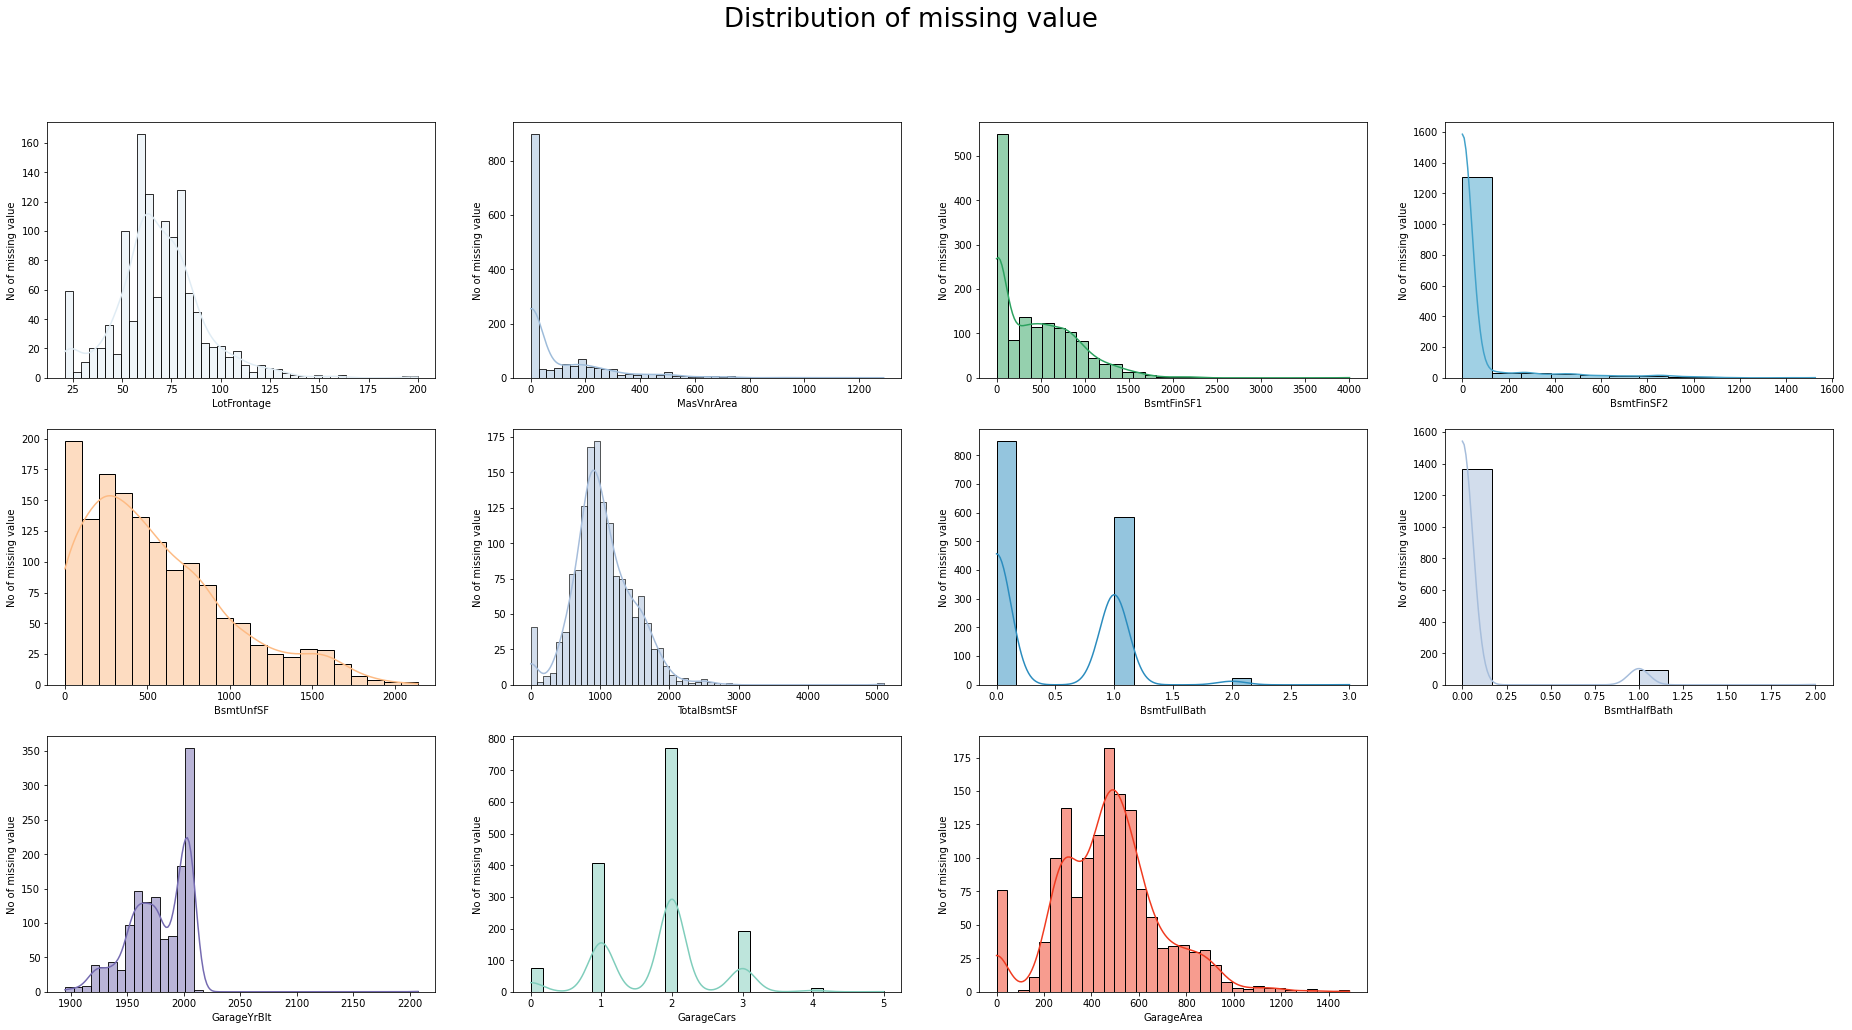

In [26]:
fig, axs = plt.subplots(3, 4, figsize=(32, 16), squeeze=False)

Axis = []
for j in range(3):
    for k in range(4):
        Axis.append(axs[j, k])

for i in range(len(test_columns_float)):
    sns.histplot(test_data[test_columns_float[i]], kde=True, color=Color[i], ax=Axis[i])
    Axis[i].set_ylabel('No of missing value')

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
    
fig.suptitle("Distribution of missing value", fontsize=26)
plt.show()

In [27]:
test_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
test_imputer.fit(test_data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']])
test_data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']] = test_imputer.transform(test_data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']])

In [28]:
test_GarageYrBlt = []
test_YearBuilt = []
for i in range(0,21):
    test_GarageYrBlt.append(test_data['GarageYrBlt'][i])
    test_YearBuilt.append(test_data['YearBuilt'][i])
test_Built_table = PrettyTable()
test_Built_table.add_column('GarageYrBlt', test_GarageYrBlt)
test_Built_table.add_column('YearBuilt', test_YearBuilt)
print(test_Built_table)

+-------------+-----------+
| GarageYrBlt | YearBuilt |
+-------------+-----------+
|    1961.0   |    1961   |
|    1958.0   |    1958   |
|    1997.0   |    1997   |
|    1998.0   |    1998   |
|    1992.0   |    1992   |
|    1993.0   |    1993   |
|    1992.0   |    1992   |
|    1998.0   |    1998   |
|    1990.0   |    1990   |
|    1970.0   |    1970   |
|    1999.0   |    1999   |
|    1971.0   |    1971   |
|    1997.0   |    1971   |
|    1975.0   |    1975   |
|    1975.0   |    1975   |
|    2009.0   |    2009   |
|    2009.0   |    2009   |
|    2005.0   |    2005   |
|    2005.0   |    2005   |
|    2003.0   |    2003   |
|    2002.0   |    2002   |
+-------------+-----------+


In [29]:
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].astype(str)

In [30]:
for i in range(len(test_data['GarageYrBlt'])):
    if test_data['GarageYrBlt'][i] == 'nan':
        test_data['GarageYrBlt'][i] = str(test_data['YearBuilt'][i])

In [31]:
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].apply(pd.to_numeric)
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].astype(int)

In [32]:
test_data['Alley'] = test_data['Alley'].fillna('NA')
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('NA')
test_data['BsmtCond'] = test_data['BsmtQual'].fillna('NA')
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('NA')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('NA')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('NA')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('NA')
test_data['GarageType'] = test_data['GarageType'].fillna('NA')
test_data['GarageFinish'] = test_data['GarageFinish'].fillna('NA')
test_data['GarageQual'] = test_data['GarageQual'].fillna('NA')
test_data['GarageCond'] = test_data['GarageCond'].fillna('NA')
test_data['PoolQC'] = test_data['PoolQC'].fillna('NA')
test_data['Fence'] = test_data['Fence'].fillna('NA')
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('NA')

In [33]:
test_object_col = [col for col in test_data.columns if test_data[col].dtypes == 'object' and test_data[col].isna().sum() > 0]
test_object_col

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType']

In [34]:
test_object_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_object_imputer.fit(test_data[test_object_col])
test_data[test_object_col] = test_object_imputer.transform(test_data[test_object_col])

In [35]:
test_columns_object = [col for col in test_data.columns if (test_data[col].dtypes == 'object')]
No_of_test_unique = []
unique_test_values = []
for i in range(len(test_columns_object)):
    No_of_test_unique.append(test_data[test_columns_object[i]].nunique())
    unique_test_values.append(test_data[test_columns_object[i]].unique())

In [36]:
No_of_train_unique = []
unique_train_values = []
missing_test_values = []
for i in range(len(test_columns_object)):
    No_of_train_unique.append(train_data[test_columns_object[i]].nunique())
    unique_train_values.append(train_data[test_columns_object[i]].unique())
    missing_test_values.append(test_data[test_columns_object[i]].isna().sum())

In [37]:
test_object_table = PrettyTable()

test_object_table.add_column('Column name', test_columns_object)
test_object_table.add_column("No of unique train values", No_of_train_unique)
test_object_table.add_column('No of unique test values', No_of_test_unique)
test_object_table.add_column("Missing test values", missing_test_values)

print(test_object_table)

+---------------+---------------------------+--------------------------+---------------------+
|  Column name  | No of unique train values | No of unique test values | Missing test values |
+---------------+---------------------------+--------------------------+---------------------+
|    MSZoning   |             5             |            5             |          0          |
|     Street    |             2             |            2             |          0          |
|     Alley     |             3             |            3             |          0          |
|    LotShape   |             4             |            4             |          0          |
|  LandContour  |             4             |            4             |          0          |
|   Utilities   |             2             |            1             |          0          |
|   LotConfig   |             5             |            5             |          0          |
|   LandSlope   |             3             |     

In [38]:
train_test_unequal_object = []
for i in range(len(test_columns_object)):
    if (train_data[test_columns_object[i]].nunique() != test_data[test_columns_object[i]].nunique()):
        train_test_unequal_object.append(test_columns_object[i])
print(train_test_unequal_object)        

['Utilities', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'Electrical', 'GarageQual', 'PoolQC', 'MiscFeature']


In [39]:
ununique_test_data = []
ununique_train_data = []
for i in train_test_unequal_object:
    ununique_train_data.append(train_data[i].unique())
    ununique_test_data.append(test_data[i].unique())

In [40]:
ununique_table = PrettyTable()
ununique_table.add_column('Column name', train_test_unequal_object)
ununique_table.add_column('Unique train values', ununique_train_data)
ununique_table.add_column('Unique test values', ununique_test_data)
print(ununique_table)

+-------------+-------------------------------------------------------------------------+------------------------------------------------------------------------+
| Column name |                           Unique train values                           |                           Unique test values                           |
+-------------+-------------------------------------------------------------------------+------------------------------------------------------------------------+
|  Utilities  |                           ['AllPub' 'NoSeWa']                           |                               ['AllPub']                               |
|  Condition2 |       ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']      |                ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']                 |
|  HouseStyle | ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] |     ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']     |
|   RoofMatl  |    ['C

In [41]:
test_data.isna().sum().sum()

0

In [42]:
test_data.shape

(1459, 80)

# Handling Categorical Data

In [43]:
train_data_len = len(train_data)
test_data_len = len(test_data)

In [44]:
target_value = train_data['SalePrice']
train_data.drop('SalePrice', axis=1, inplace=True)
Full_data = pd.concat((train_data, test_data)).reset_index(drop=True)

In [45]:
Object_column = [col for col in Full_data.columns if Full_data[col].dtypes == 'object']
Unique_values = []
Object_col = []
for i in Object_column:
    Object_col.append(i)
    Unique_values.append(Full_data[i].nunique())
Unique_table = PrettyTable()
Unique_table.add_column("Column Name", Object_col)
Unique_table.add_column("No of unique values", Unique_values)
print(Unique_table)

+---------------+---------------------+
|  Column Name  | No of unique values |
+---------------+---------------------+
|    MSZoning   |          5          |
|     Street    |          2          |
|     Alley     |          3          |
|    LotShape   |          4          |
|  LandContour  |          4          |
|   Utilities   |          2          |
|   LotConfig   |          5          |
|   LandSlope   |          3          |
|  Neighborhood |          25         |
|   Condition1  |          9          |
|   Condition2  |          8          |
|    BldgType   |          5          |
|   HouseStyle  |          8          |
|   RoofStyle   |          6          |
|    RoofMatl   |          8          |
|  Exterior1st  |          15         |
|  Exterior2nd  |          16         |
|   MasVnrType  |          4          |
|   ExterQual   |          4          |
|   ExterCond   |          5          |
|   Foundation  |          6          |
|    BsmtQual   |          5          |


In [46]:
Label_encoding = [col for col in Full_data.columns if (Full_data[col].dtypes == 'object' and Full_data[col].nunique() > 5)]

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Label_encoding:
    Full_data[i] = le.fit_transform(Full_data[[i]])

In [48]:
Full_data = pd.get_dummies(Full_data)

In [49]:
Train_data = Full_data.iloc[:train_data_len, :]

In [50]:
Test_data = Full_data.iloc[train_data_len:, :]

In [51]:
len(Train_data), len(Test_data)

(1460, 1459)

In [52]:
Train_data.isna().sum().sum(), Test_data.isna().sum().sum()

(0, 0)

In [53]:
Train_data = Train_data.drop(['Id'], axis=1)
Test_data = Test_data.drop(['Id'], axis=1)

In [54]:
Train_data.shape, Test_data.shape

((1460, 153), (1459, 153))

# Standardization

In [55]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

In [56]:
X = Train_data.iloc[:, :].values
y = target_value.values
X_test = Test_data.iloc[:, :].values

In [57]:
# y

In [58]:
# X_sc = sc.fit_transform(X)
# X_test_sc = sc.transform(X_test)
# y_sc = sc.fit_transform([y])
# X_sc

In [59]:
# y_sc=np.squeeze(y_sc)

# Model deployment

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
X_train, X_CV, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train.shape, X_CV.shape

((1168, 153), (292, 153))

## Linear Regression approach

In [63]:
Linear_regressor = LinearRegression()

In [64]:
Linear_regressor.fit(X_train, y_train)
reg_pred = Linear_regressor.predict(X_train)
Linear_regressor.fit(X_CV, y_cv)
reg_Pred = Linear_regressor.predict(X_CV)
print("Training MSE : ", mean_squared_error(y_train, reg_pred) ** 0.5)
print("Cross Validation MSE : ",mean_squared_error(y_cv, reg_Pred) ** 0.5)

Training MSE :  24136.719559938603
Cross Validation MSE :  22745.72855947195


In [65]:
Linear_regressor.fit(X, y)
y_pred = Linear_regressor.predict(X)
print("The r2 score of Linear regression is : ", r2_score(y, y_pred))

The r2 score of Linear regression is :  0.8895783257558366


## Lasso Regression approach

In [66]:
Lasso = Lasso(alpha=0.01, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, 
              tol=0.0001, warm_start=False, positive=False, random_state=1, selection='cyclic')

In [67]:
Lasso.fit(X_train, y_train)
Lasso_pred = Lasso.predict(X_train)
Lasso.fit(X_CV, y_cv)
Lasso_Pred = Lasso.predict(X_CV)
print("Training MSE : ", mean_squared_error(y_train, Lasso_pred) ** 0.5)
print("Cross Validation MSE : ",mean_squared_error(y_cv, Lasso_Pred) ** 0.5)

Training MSE :  24136.719732558373
Cross Validation MSE :  22745.728615646618


In [68]:
Lasso.fit(X, y)
y_pred = Lasso.predict(X)
print("The r2 score of Lasso regression is : ", r2_score(y, y_pred))

The r2 score of Lasso regression is :  0.8895783245992763


## RandomForest regression approach

In [69]:
rfr = RandomForestRegressor(max_features = 'auto', n_estimators = 1000, random_state = 0, oob_score = True)

In [70]:
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_train)
rfr.fit(X_CV, y_cv)
y_Pred = rfr.predict(X_CV)
print("Training MSE : ", mean_squared_error(y_train, y_pred) ** 0.5)
print("Cross Validation MSE : ",mean_squared_error(y_cv, y_Pred) ** 0.5)

Training MSE :  11004.51481806849
Cross Validation MSE :  13093.27978126264


In [71]:
rfr.fit(X, y)
y_pred = rfr.predict(X)
print("The r2 score of RandomForest regression is : ", r2_score(y, y_pred))

The r2 score of RandomForest regression is :  0.9819706107526035


In [72]:
gbr = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=1000, subsample=1.0, 
                                criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, 
                                verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                                tol=0.0001, ccp_alpha=0.0)

In [73]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_train)
gbr.fit(X_CV, y_cv)
y_Pred = gbr.predict(X_CV)
print("Training MSE : ", mean_squared_error(y_train, y_pred) ** 0.5)
print("Cross Validation MSE : ",mean_squared_error(y_cv, y_Pred) ** 0.5)

Training MSE :  2635.0710466062983
Cross Validation MSE :  66.56183993353416


In [74]:
gbr.fit(X, y)
y_pred = gbr.predict(X)
print("The r2 score of Gradient boosting regression is : ", r2_score(y, y_pred))

The r2 score of Gradient boosting regression is :  0.998117416550658


In [75]:
y_pred = gbr.predict(X_test)
y_pred

array([115344.15638346, 167746.69536472, 188917.26823855, ...,
       169240.11237234, 106135.19120914, 236098.97868108])

In [76]:
output = pd.DataFrame({'Id' : test_data['Id'], 'SalePrice' : y_pred})
output.to_csv('submission.csv', index = False)